
Xây dựng mô hình học máy với thuật toán Cây quyết định (Decision Tree) dự đoán một bệnh nhân u vú là lành tính hay ác tính. Sinh viên sử dụng tập 961 bệnh nhân u vú đã xử lý ở Chương 2; 

1. Đọc tập dữ liệu đã chuẩn hóa ở chương 2

2. Phân tách các biến Độc lập (X) - Phụ thuộc (Y) tương ứng

3. Chia tập dữ liệu thành 2 phần Train - Test với tỷ lệ 70% - 30%

4. Xây dựng model dự đoán bệnh nhân bị bệnh u vú lành tính - ác tính với thuật toán cây quyết định (Decision Tree), Sử dụng model với các tham số mặc định để huấn luyện và kiểm thử trên Train – Test.

**Hiển thị các kết quả sau của model:**

    a)Xác định và trực quan hóa độ quan trọng của các thuộc tính độc lập trong tập huấn luyện
    b)Hiển thị cây quyết định trên tập Huấn luyện.
    c)Độ chính xác của model (accuracy) trên tập Train – Test
    d)Tổng số mẫu dự đoán đúng - sai trên tập Test 
    e)Ma trận confusion matrix trên tập Test


5. Dự đoán với mô hình xây dựng được
- Bệnh nhân 1 có các thông số như sau:

    * Age:  40 tuổi;
    * Weight: 60 Kg
    * Shape: Round;
    * Margin: Obscured!
    * Density: Low

- Bệnh nhân 2 có các thông số như sau:  
    * Age:  64 tuổi;
    * Weight: 70 kg
    * Shape: Round;
    * Margin: Circumscribed
    * Density: Iso

Sử dụng model ở trên dự đoán xem bệnh nhân 1, 2  này bị u lành tính  hay ác tính;



In [1]:
#Gọi các thư viện sử dụng:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#-----------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
#1. đọc tập dữ liệu đã chuẩn hoá
df_patient = pd.read_csv('Data_Practice_OK.csv')
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      961 non-null    int64
 1   Shape    961 non-null    int64
 2   Margin   961 non-null    int64
 3   Density  961 non-null    int64
 4   Target   961 non-null    int64
dtypes: int64(5)
memory usage: 37.7 KB


## Mô tả các thuộc tính:
---
* 1.Target: 0: U lành - 1: U ác
* 2.Age: Độ tuổi
    * 0: Tuổi từ 17-33 tuổi
    * 1: Tuổi từ 33 - 49 tuổi
    * 2: Tuổi từ 49 - 64 tuổi
    * 3: Tuổi từ 64 - 80 tuổi
    * 4: Tuổi từ 80 - 96 tuổi
* 3.Shape: Hình dạng khối u
    * 0: Irregular
    * 1: Lobular
    * 2: Round
    * 3: Oval
* 4.Margin: Đường biên khối u
    * 0: Spiculated
    * 1: ill-defined
    * 2: Obscured
    * 3: Microlobulated
    * 4: Circumscribed
* 5.Density: Mật độ khối u
    * 0: High
    * 1: Iso
    * 2: Low
    * 3: Fat-containing

In [3]:
df_patient.sample(5)

,Age,Shape,Margin,Density,Target
83,3,2,2,1,0
362,2,3,1,0,0
300,3,2,0,0,1
748,3,2,3,0,1
925,3,3,1,0,0


In [4]:
#2. phân tách biến độc lập X, phụ thuộc y
X = df_patient.iloc[:, 0:4].values
print(X)

y = df_patient.iloc[:,-1].values
print(y)

[[4 0 0 0]
 [2 1 1 0]
 [3 2 0 0]
 ...
 [3 2 0 0]
 [4 2 0 0]
 [3 0 3 0]]
[1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1
 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1
 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1
 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 0 1 1 1 0 0 1 0 0 1 1

In [5]:
#3. chia dữ liệu thành 2 tập train-test với tỉ lệ 70-30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size=0.7,
                                                   shuffle=True)
print('Tập huấn luyện: ', len(y_train))
print('Tập Test: ', len(y_test))

Tập huấn luyện:  672
Tập Test:  289


In [6]:
#4. xây dựng model dự đoán bệnh nân bị u vú lành tính - ác tính với thuật toán cây quyết định 

# Gọi thư viện thuật toán DecisionTreeClasifier
from sklearn.tree import DecisionTreeClassifier

# Khai báo mô hình
Tree_patient = DecisionTreeClassifier()

# Liệt kê danh sách tham số:
Tree_patient.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [7]:
#Huấn luyện:
Tree_patient.fit(X_train, y_train)

DecisionTreeClassifier()

['Age', 'Shape', 'Margin', 'Density']
[0.11712143 0.10792413 0.7065843  0.06837015]


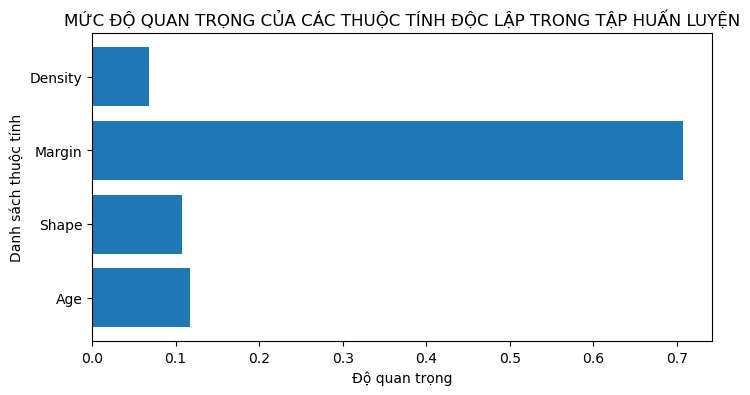

In [8]:
#a. xác định và trực quan hoá độ quan trọng của các thuộc tính độc lập trong tập huấn luyện

# Đặt tên cho các thuộc tính và target
feature_names = ['Age',
                'Shape',
                'Margin',
                'Density']
target_names = ['0: U lành', '1: U ác']

print(feature_names)
print(Tree_patient.feature_importances_)

# Trực quan hóa độ quan trọng của các thuộc tính độc lập trong tập huấn luyện
plt.figure(figsize=(8,4))
plt.barh(feature_names, Tree_patient.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THUỘC TÍNH ĐỘC LẬP TRONG TẬP HUẤN LUYỆN')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.show()

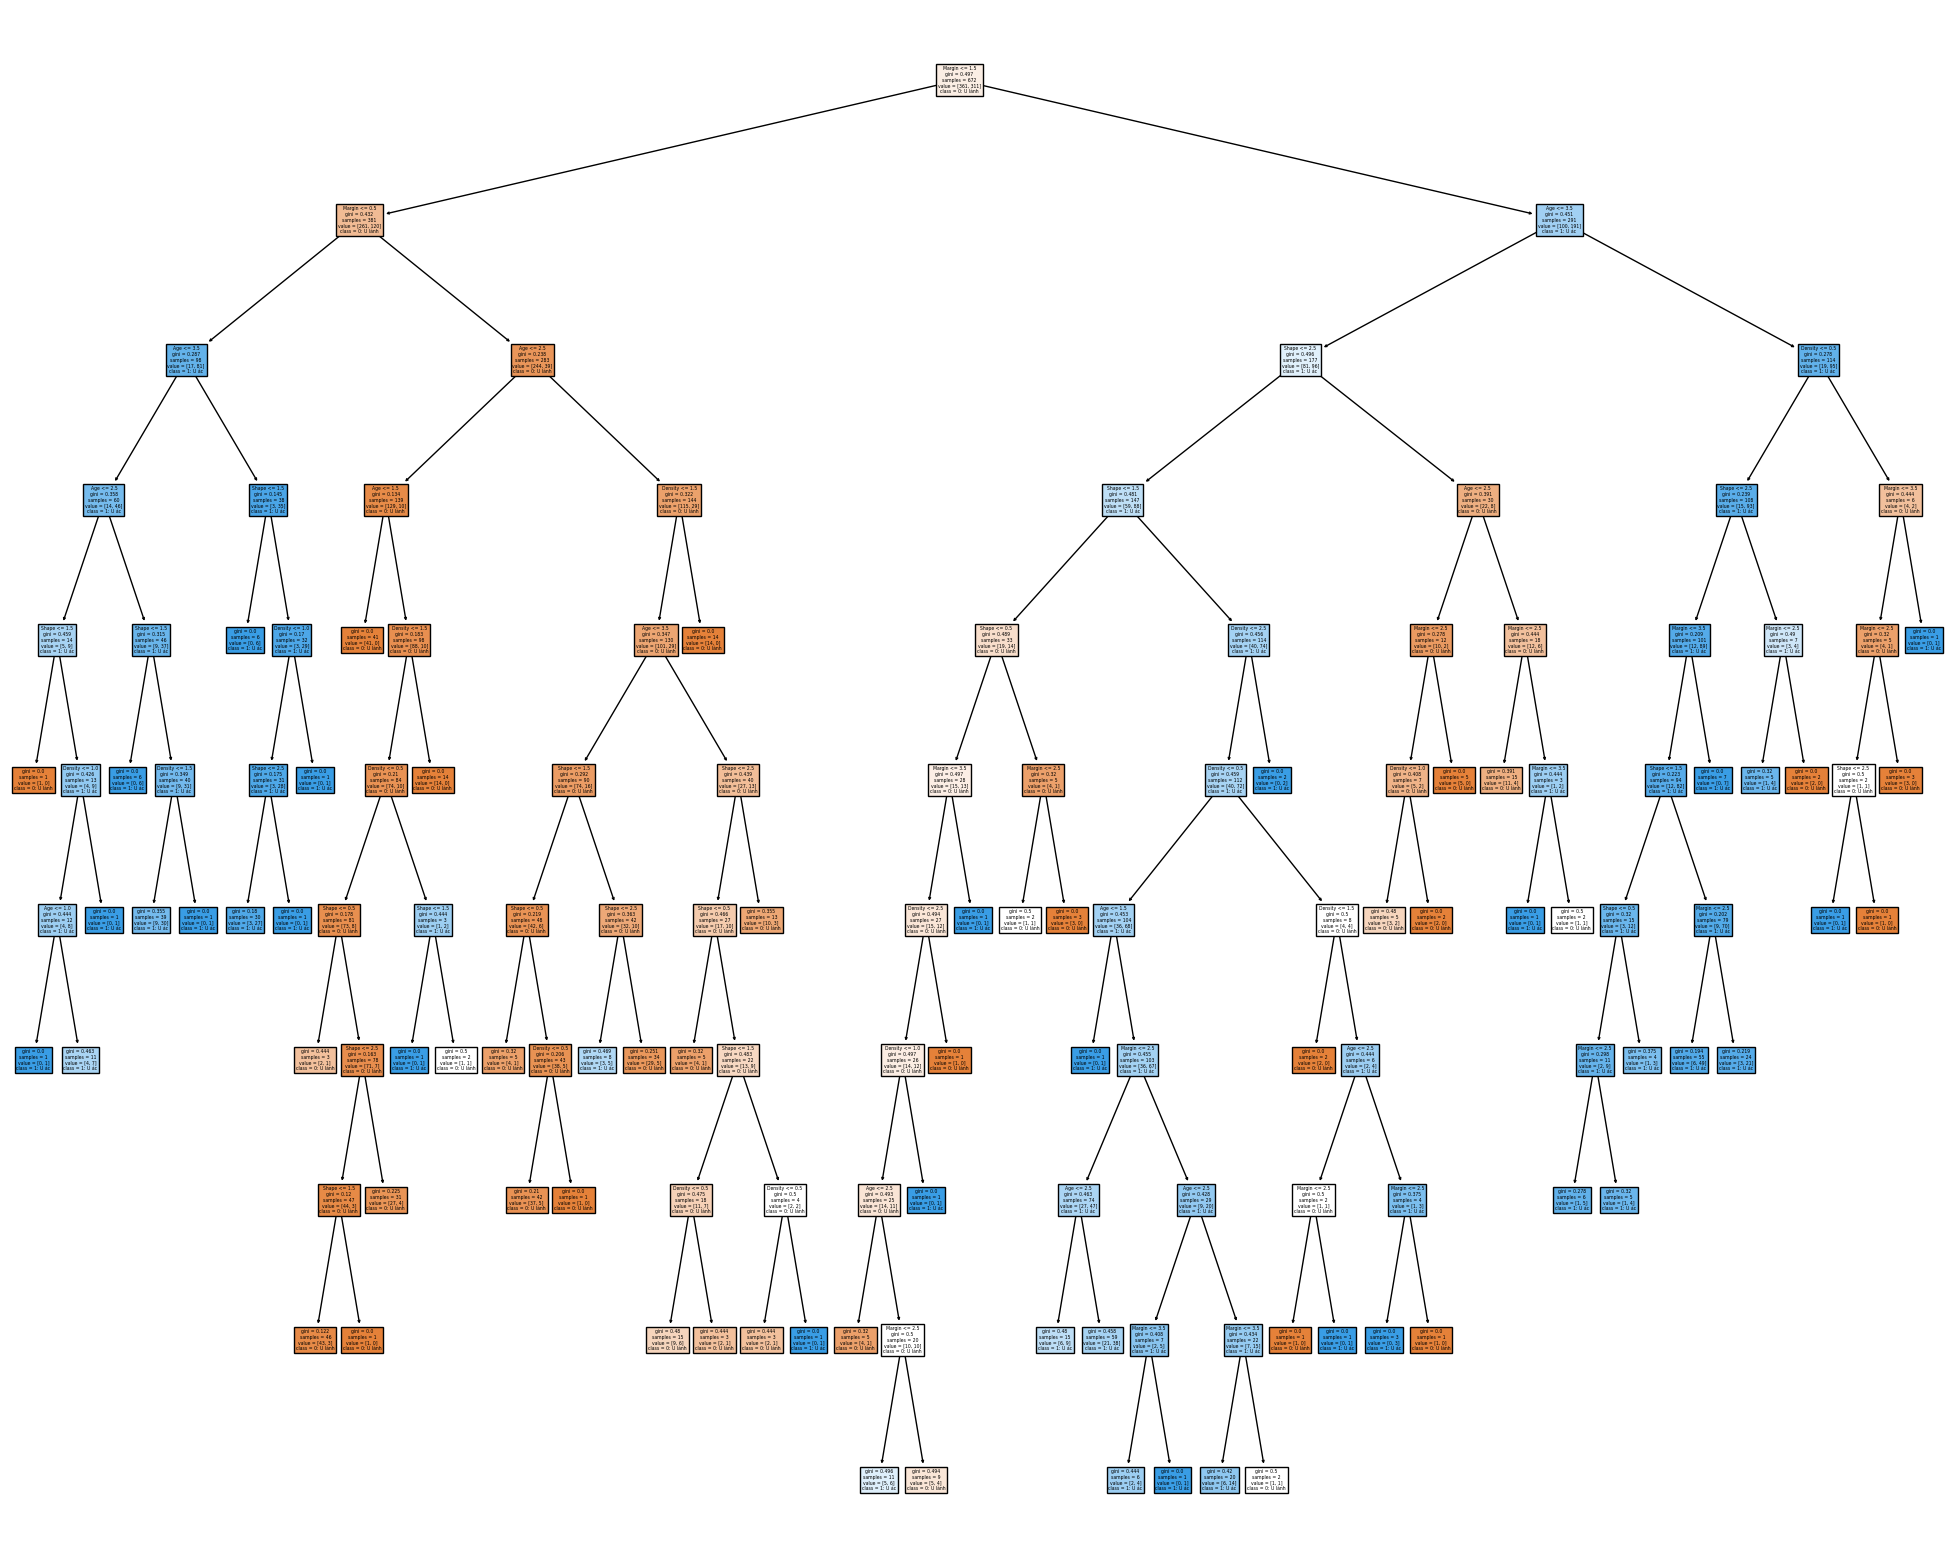

In [9]:
#b. hiển thị cây quyết định trên tập huấn luyện

from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

tree.plot_tree(Tree_patient,
              feature_names=feature_names,
              class_names=target_names,
              filled=True)

plt.show()

In [10]:
#c độ chính xác trên tập train - test
acc_train = Tree_patient.score(X_train, y_train)
print('Độ chính xác trên tập huấn luyện: ', round(acc_train*100, 2), '%')

Độ chính xác trên tập huấn luyện:  82.44 %


In [11]:
from sklearn.metrics import accuracy_score
y_pred = Tree_patient.predict(X_test)

acc = accuracy_score(y_test, y_pred, normalize=True)
print('Độ chính xác trên mô hình tập test: ', round(acc*100, 2), '%')

Độ chính xác trên mô hình tập test:  78.89 %


In [12]:
#d tổng số mẫu dự đoán đúng sai trên tập test
acc_num = accuracy_score(y_test, y_pred, normalize=False)
print('Tổng số mẫu dự đoán đúng trên tập Test: ', acc_num, '/', len(y_test))
print('Tổng số mẫu dự đoán sai trên tập Test: ', len(y_test)-acc_num, '/', len(y_test))

Tổng số mẫu dự đoán đúng trên tập Test:  228 / 289
Tổng số mẫu dự đoán sai trên tập Test:  61 / 289


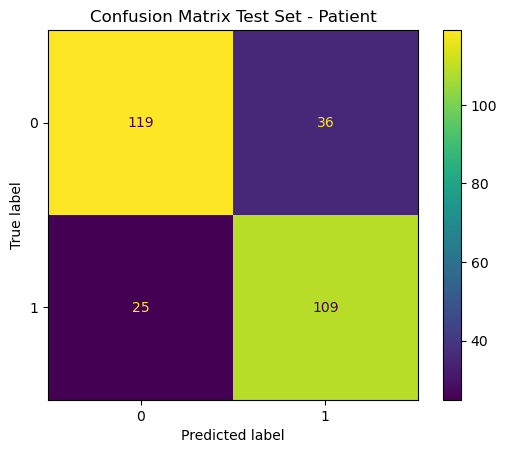

In [13]:
#e ma trận confusion matrix để kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_patient = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix Test Set - Patient')
plt.show()

### 5. Dự đoán với mô hình xây dựng được
- Bệnh nhân 1 có các thông số như sau:

    * Age:  40 tuổi;
    * Weight: 60 Kg
    * Shape: Round;
    * Margin: Obscured!
    * Density: Low

- Bệnh nhân 2 có các thông số như sau:  
    * Age:  64 tuổi;
    * Weight: 70 kg
    * Shape: Round;
    * Margin: Circumscribed
    * Density: Iso

In [14]:
#Bệnh nhân 1:
patient_1 = np.array([[1, 2, 2, 2]])
print('Thông tin bệnh nhân số 1:', patient_1)

patient_1_pred = Tree_patient.predict(patient_1)
print(patient_1_pred)
if (patient_1_pred == 0):
    print('Bệnh nhân có u lành tính')
else:
    print('Bệnh nhân có u ác tính')

Thông tin bệnh nhân số 1: [[1 2 2 2]]
[0]
Bệnh nhân có u lành tính


In [15]:
#Bệnh nhân 2
patient_2 = np.array([[2, 2, 4, 1]])
print('Thông tin bệnh nhân số 2: ', patient_2)

patient_2_pred = Tree_patient.predict(patient_2)
print(patient_2_pred)
if (patient_2_pred == 0):
    print('Bệnh nhân có u lành tính')
else:
    print('Bệnh nhân có u ác tính')

Thông tin bệnh nhân số 2:  [[2 2 4 1]]
[0]
Bệnh nhân có u lành tính
